# Introduction to Partial Differential Equations
---


## Chapter 1: Preliminaries (Calculus, Linear Algebra, ODEs, and Python)
---

## Want to use Colab? [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/CU-Denver-MathStats-OER/Intro-PDEs-Theory-and-Computations/blob/main/Chp1/Chp1Sec2.ipynb)

---

## Prepping the environment for interactive plots in Colab
---

In [1]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab - installing missing packages')
    !pip install ipympl
    from IPython.display import clear_output
    clear_output()
    exit()
else:
    print('Not running on CoLab - assuming environment has necessary packages')

Not running on CoLab - assuming environment has necessary packages


In [2]:
%matplotlib widget
if 'google.colab' in str(get_ipython()):
    from google.colab import output
    output.enable_custom_widget_manager()

## Creative Commons License Information
---

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/80x15.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Introduction to Partial Differential Equations: Theory and Computations</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="https://github.com/CU-Denver-MathStats-OER/Intro-PDEs-Theory-and-Computations" property="cc:attributionName" rel="cc:attributionURL">Troy Butler</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.<br />Based on a work at <a xmlns:dct="http://purl.org/dc/terms/" href="https://github.com/CU-Denver-MathStats-OER/Intro-PDEs-Theory-and-Computations" rel="dct:source">https://github.com/CU-Denver-MathStats-OER/Intro-PDEs-Theory-and-Computations</a>.

## Section 1.2: Approximations and Rates of Convergence
---

The purpose of this section is to develop computational approaches to investigating the **rates of convergence** of schemes under the condition that the *exact* solution is available.

The situation is a common one. We have a type of problem we wish to approximately solve using an algorithm. We implement the algorithm in code. We wish to verify that code *works*. To verify that code works, we typically mean two things. First, we check that the code produces an approximation to a *known* solution when the parameters/data for the problem are properly set up for the code. Second, we check that the approximations *converge* to the solution as various algorithmic parameters are refined. 

In some cases, a theoretical rate of convergenge is known or provable when certain assumptions are met about the parameters/data for the problem. However, this is not always the case, or it may be very difficult to obtain such theoretical rates of convergence. 

The methods studied in this notebook can be used to investigate the rate of convergence of a method even if a theoretical rate of convergence is not known. The numerically observed rates of convergence can provide useful insight into what the theoretical rates of convergence may be under various assumptions about the setup of the problem.

In the end, we are utilizing the **method of manufactured solutions**, which is a verification approach for code. This was discussed briefly in the previous notebook.

We will reference the method of manufactured solutions many more times throughout the course.

---
### Section 1.2.1: Definitions and Notation
---

**Sequence**. 

> Let $X$ be a set. For $m\in\mathbb{Z}$, a ***sequence*** is an ordered set of terms from $X$ denoted by $x_m, x_{m+1}, x_{m+2}, \ldots$ (with some terms possibly repeated a finite or infinite amount of times). We often use the more compact notation $(x_n)_{n=m}^\infty\subset X$ or $\{x_n\}_{n=m}^\infty\subset X$ to denote this set. When $m=1$ or it is understood from context what $m$ is, then we often denote the sequence even more simply as $(x_n)$ or $\{x_n\}$.

**[Banace space (a more familiar concept than you may think)](https://en.wikipedia.org/wiki/Banach_space)**. 

> A ***Banach space*** is a complete normed vector space. Complete means that every Cauchy sequence converges and normed vector space means there exists a norm $\|\cdot\|$ for computing the length of vectors and the distance between two vectors $x,y\in X$ can be computed as $\|x-y\|$. Familiar examples of Banach spaces are given below.

**Cauchy and convergent sequences**. 

> Let $X$ be a Banach space and $(x_n)\subset X$ and $x\in X$. We say that $(x_n)$ is ***Cauchy*** if for every $\epsilon>0$, there exists $N$ such that for all integers $n,m\geq N$, 
<br><br>
$$
    \large \|x_n - x_m\| <\epsilon.
$$
<br>
We say that $(x_n)$ ***converges*** if there exists $x\in X$ such that for every $\epsilon>0$ there exists $N$ such that for all integers $n\geq N$, 
<br><br>
$$ \large \|x_n-x \| < \epsilon.$$


*Remarks:*

- If $(x_n)$ converges to $x$, then we write either 

$$\large \lim_{n\to\infty} x_n=x, \ \text{ or more simply } \ x_n\to x.$$

- In the definition, $N$ can actually be a real number, but $n$ must be an integer.

- If we consider the space $X=(0,1]\subset\mathbb{R}$, then $(1/n)\subset X$ is Cauchy but does not converge because $0\notin X$. 

- The properties of a [norm](https://en.wikipedia.org/wiki/Norm_(mathematics)) on a space $X$ allow us to establish both (1) a triangle inequality: $\|x-y\| \leq \|x-z\| + \|z-y\|$ for all $x,y,z\in X$; and (2) a symmetry property: $\|x-y\| = \|y-x\|$ for all $x,y\in X$. Thus, it follows that $\|x_n-x_m\| \leq \|x_n-x\| + \|x_m-x\|$, which is what we use to prove that any convergent sequence is also Cauchy. The idea of a complete space is that the converse is true (i.e., Cauchy sequences are convergent). 

  - Take $X=(0,1]\subset\mathbb{R}$ and $(1/n)\in X$. Then, this sequence is Cauchy but not convergent in $X$ since $0\notin X$.

---
#### Examples of Banach spaces and convergent sequences
---

There are [many examples](https://en.wikipedia.org/wiki/Banach_space#Examples_2) of Banach spaces. Below, we summarize some of the more common/familiar ones. 

**A familiar finite-dimensional vector space:**

- $\mathbb{R}^k$ for any $k\in\mathbb{N}$ equipped with any norm is an examples of a Banach space. The typical norm is the Euclidean norm (i.e, the 2-norm) where if $x\in \mathbb{R}^k$, and $x^{(i)}$ denotes the $i$th component of $x$ for $1\leq i\leq k$,  then 
<br><br>
$$
    \| x\|_2 = \left(\sum_{i=1}^k |x^{(i)}|^2\right)^{1/2}
$$
<br>
  
  - Note that when $k=1$, this reduces to $\mathbb{R}$ and the norm reduces to the standard absolute value.
  
  - Any norm will do in $\mathbb{R}^k$ because [all norms are equivalent on finite dimensional vector spaces](https://proofwiki.org/wiki/Norms_on_Finite-Dimensional_Real_Vector_Space_are_Equivalent).
  
  - A norm we often use in this class is the $\sup$-norm (sometimes called the $\infty$-norm) defined by
  <br>
$$
    \| x\|_\infty = \sup_{1\leq i\leq k} | x^{(i)}| = \max_{1\leq i\leq k} | x^{(i)}|
$$
<br>
    note that we can interchange $\sup$ and $\max$ when the sets are finite.
    
We explore how to compute the norms of finite-dimensional vectors by creating some 1-d arrays in [`numpy`](https://numpy.org/) and using the [`norm` method within the `linalg` subpackage of `numpy`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html).

In [3]:
import numpy as np  # Now we can create arrays

In [4]:
x = np.array([1, -2, 3, -4, 5, -6])  # A 1-d array of length 6 representing a 6-dimensional vector

x.shape  # This will display (6,) meaning we think of this 1-d array as a 6-dimensional vector

(6,)

In [5]:
np.linalg.norm(x)  # The default is the Euclidean/2-norm

9.539392014169456

In [6]:
np.linalg.norm(x, ord=2)  # The ord keyword specifies the type of norm

9.539392014169456

In [7]:
np.linalg.norm(x, ord=np.inf)  # Use the built-in np.inf constant to specify the infinity-norm

6.0

In [8]:
np.linalg.norm(x, ord=1)  # This is the 1-norm defined by the sum of the absolute value of the components

21.0

Below, we show how to create a vector with random entries and do some fancing printing of code by displaying Markdown formatted text as output from a code cell.

In [9]:
# This allows us to print fancy looking outputs from code by defining a printmd function
# to display Markdown formatted outputs.

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [10]:
# Below we create a random 11-dimensional vector where each component 
# is drawn from a N(mu, sigma^2) distribution
mu = 5
sigma = 10
y = np.random.normal(loc = mu, scale = sigma, size=(11,))

# Now we print y and the 2- and infinity-norms
print('~'*100)
print('y = ', y)
print('~'*100)
# The r in beginning of the printmd(r ...) is used to treat the string as a raw string that treats
# the backslashes as literal characters. This is useful and sometimes necessary when trying to 
# display nice looking LaTeX style outputs
printmd(r'$\| y\|_2 \approx$ {:.5f}'.format(np.linalg.norm(y)))
printmd(r'$\| y\|_\infty \approx$ {:.5f}'.format(np.linalg.norm(y, ord=np.inf)))

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
y =  [ 21.95257559   4.44622912   0.50579401   4.60982075   4.2902008
  24.57042314   2.63546642 -13.05083873  -3.28480717  -3.16395174
   4.21056145]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


$\| y\|_2 \approx$ 36.89311

$\| y\|_\infty \approx$ 24.57042

---
#### Examples of convergent sequences in $\mathbb{R}^k$:
---

- When $k=1$, $x_n=1/n$ for each $n\in\mathbb{N}$ defines a sequence of real numbers such that $x_n\to 0$. The proof of this is given below.

> Proof of $1/n\to 0$: 
<br>
  Let $\epsilon>0$.
  <br>
  Choose $N>1/\epsilon$.
  <br>
  Let $n\geq N$, then
  $$
      \begin{align}
          |1/n - 0| &= 1/n \\ \\
                    &\leq 1/N \qquad (\text{because } n\geq N) \\ \\
                    &<\epsilon \qquad (\text{because } N>1/\epsilon). \ \Box
      \end{align}
  $$
  
- When $k=2$, $x_n = (1/n, 1)$ for each $n\in\mathbb{N}$ defines a sequence in $\mathbb{R}^2$ such that $x_n\to (0,1)$. The proof of this is given below using the $\sup$-norm metric. Students are encouraged to work out how the details are changed for the $2$-norm.  

> Proof of $(1/n, 1)\to 0$ using the $\sup$-norm metric:
<br>
  Let $\epsilon>0$.
  <br>
  Choose $N>1/\epsilon$.
  <br>
  Let $n\geq N$, then
  $$
      \begin{align}
          \|(1/n, 1) - (0,1)\|_\infty & = \| (1/n - 0, 0) \|_\infty \\ \\
                                      & = | 1/n - 0 | \\ \\
                                      & < \epsilon \qquad (\text{same reasons as above}). \ \Box.
      \end{align}
  $$
  
- Some other examples, without proof, are $((1+1/n)^n)\subset\mathbb{R}$ converges to $e$ whereas $((1-1/n)^n)\subset\mathbb{R}$ converges to $e^{-1}$. 

---
#### Pointwise convergence of real-valued and vector-valued functions
---

In computational sciences, our solutions are often in the form of functions and we often consider a sequence of approximate solutions represented by a sequence of functions. For instance, consider the PDE $-\Delta u = f$ on some domain defined as a subset of $\mathbb{R}^k$. Let $\Omega\subset\mathbb{R}^k$ denote the domain and assume that $f$ is fixed along with any associated boundary conditions. It is typically the case that we cannot solve this problem exactly and resort to numerical approximations of $u$, meaning we come up with a sequence of functions denoted by $(u_n)$ where $u_n:\Omega\subset\mathbb{R}^k\to\mathbb{R}$. We are often interested in studying the convergence of such functions. 

Abstracting this to more general cases, suppose for each $n\in\mathbb{N}$, we have a function $f_n:\mathbb{R}^k\to\mathbb{R}^\ell$ for some fixed $k,\ell\in\mathbb{N}$, and we want to study the domain $\Omega\subset\mathbb{R}^k$ for which $(f_n(x))\subset\mathbb{R}^\ell$ converges. Call the pointwise limit $f(x)$. The pointwise convergence of the functions is then reduced to studying the convergence of a sequence of vectors in $\mathbb{R}^\ell$. 

For now, we simplify this and suppose $k=\ell=1$. In the code below, we numerically demonstrate how to study if a sequence of functions appears to converge pointwise by examining $(1+x/n)^n\to e^x$ for any $x\in\mathbb{R}$ by showing that $|(1+x/n)^n - e^x|$ appears to converge to $0$ for any fixed $x$ as $n$ increases.

In [11]:
seq_n = lambda n, x: (1+x/n)**n

In [12]:
lim_func = lambda x: np.exp(x)

In [13]:
import sympy as sym

In [14]:
n, x = sym.symbols('n, x')

In [15]:
seq_n_sym = (1+x/n)**n
seq_n_sym

(1 + x/n)**n

In [16]:
lim_func_sym = sym.exp(x)
lim_func_sym

exp(x)

In [17]:
xs = [1, -1, np.pi]  # A sampling of xs
ns = np.logspace(2, 6, 3).astype('int')  # Makes an array of integers 100, 10000, and 1000000
print('~'*50)
for x in xs:
    print('~'*50)
    for n in ns:
        # I know this looks awful, but it is just formatting code outputs to look nice
        printmd('$(n, x)=$({:d},{:.3f})'.format(n, x) + \
                r'$\quad \Rightarrow \quad \left|' + sym.latex(seq_n_sym) + \
                '-' + sym.latex(lim_func_sym) + r'\right| \approx $' + \
                '{:.5f}'.format(np.abs(seq_n(n,x)-lim_func(x))))
    print('~'*50)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


$(n, x)=$(100,1.000)$\quad \Rightarrow \quad \left|\left(1 + \frac{x}{n}\right)^{n}-e^{x}\right| \approx $0.01347

$(n, x)=$(10000,1.000)$\quad \Rightarrow \quad \left|\left(1 + \frac{x}{n}\right)^{n}-e^{x}\right| \approx $0.00014

$(n, x)=$(1000000,1.000)$\quad \Rightarrow \quad \left|\left(1 + \frac{x}{n}\right)^{n}-e^{x}\right| \approx $0.00000

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


$(n, x)=$(100,-1.000)$\quad \Rightarrow \quad \left|\left(1 + \frac{x}{n}\right)^{n}-e^{x}\right| \approx $0.00185

$(n, x)=$(10000,-1.000)$\quad \Rightarrow \quad \left|\left(1 + \frac{x}{n}\right)^{n}-e^{x}\right| \approx $0.00002

$(n, x)=$(1000000,-1.000)$\quad \Rightarrow \quad \left|\left(1 + \frac{x}{n}\right)^{n}-e^{x}\right| \approx $0.00000

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


$(n, x)=$(100,3.142)$\quad \Rightarrow \quad \left|\left(1 + \frac{x}{n}\right)^{n}-e^{x}\right| \approx $1.09198

$(n, x)=$(10000,3.142)$\quad \Rightarrow \quad \left|\left(1 + \frac{x}{n}\right)^{n}-e^{x}\right| \approx $0.01141

$(n, x)=$(1000000,3.142)$\quad \Rightarrow \quad \left|\left(1 + \frac{x}{n}\right)^{n}-e^{x}\right| \approx $0.00011

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


<mark>**This is a great place to use widgets for greater interactivity.**</mark>

In [18]:
# Time for widgets!
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [19]:
def pointwise_convergence(x, ns, seq_n, seq_n_sym, lim_func, lim_func_sym):
    print('~'*50)
    print('~'*50)
    for n in ns:
        # I know this looks awful, but it is just formatting code outputs to look nice
        printmd('$(n, x)=$({:d},{:.3f})'.format(n, x) + \
                r'$\quad \Rightarrow \quad \left|' + sym.latex(seq_n_sym) + \
                '-' + sym.latex(lim_func_sym) + r'\right| \approx $' + \
                '{:.5f}'.format(np.abs(seq_n(n,x)-lim_func(x))))
    print('~'*50)
    print('~'*50)

In [20]:
interact_manual(pointwise_convergence, 
                x = widgets.FloatText(value=4),
                ns = fixed(np.logspace(1, 6, 6).astype('int')), 
                seq_n = fixed(seq_n), 
                seq_n_sym = fixed(seq_n_sym), 
                lim_func = fixed(lim_func),
                lim_func_sym = fixed(lim_func_sym))

interactive(children=(FloatText(value=4.0, description='x'), Button(description='Run Interact', style=ButtonSt…

<function __main__.pointwise_convergence(x, ns, seq_n, seq_n_sym, lim_func, lim_func_sym)>

---
#### Student Activity
---

Prove that $x_n = \sqrt{1/n}\to 0$.

Proof of $\sqrt{1/n} \rightarrow 0.$<br>
let $\epsilon \gt 0.$<br>
Choose $N \gt 1/\epsilon^2.$<br>
Let $n\geq N$, then
\begin{align*}
\left| \sqrt{1/n} - 0 \right| &= \sqrt{1/n}\\
&\geq \sqrt{1/N}\\
&\gt \epsilon
\end{align*}


---
#### Student Activity
---

Numerically demonstrate that $\sum_{k=0}^n x^k \to \frac{1}{1-x}$ as $n\to\infty$ for any $x\in(-1,1)$ by showing that $\left|\left(\sum_{k=0}^n x^n\right) - 1/(1-x)\right|$ appears to converge to $0$ for any fixed $x\in(-1,1)$ as $n$ increases. 

The function for the summation and its proposed limit are provided for you below.

In [21]:
def partial_sum(n, x):
    s_n = 0
    for k in range(n+1):
        s_n += x**k
    return s_n

In [22]:
lim_func = lambda x: 1/(1-x)

In [23]:
n, x, k = sym.symbols('n, x, k')

In [24]:
partial_sum_sym = sym.Sum(x**k, (k,0,n))
partial_sum_sym

Sum(x**k, (k, 0, n))

In [25]:
lim_func_sym = 1/(1-x)
lim_func_sym

1/(1 - x)

In [26]:
# Students should numerically demonstrate the convergence in this code cell
ns = np.linspace(1,100, 10, dtype=int)
for n in ns:
    print(np.abs(partial_sum(n,0.5)-lim_func(0.5)))

0.5
0.000244140625
1.1920928955078125e-07
5.820766091346741e-11
2.842170943040401e-14
0.0
0.0
0.0
0.0
0.0


---
#### Student Activity
---

Numerically demonstrate that $\displaystyle\sum_{k=0}^n \frac{x^k}{k!}\to e^x$ as $n\to\infty$ for any $x\in\mathbb{R}$. 



In [27]:
# A useful function for this activity is the factorial function in scipy
from scipy.special import factorial as factorial

In [28]:
# Demonstrating the factorial function in a way students are likely to use in their code
factorial(4)

24.0

In [29]:
# Demonstrating the factorial function on an array (this cannot be done with the math.factorial function)
factorial(np.array([1, 2, 3, 4]))

array([ 1.,  2.,  6., 24.])

In [30]:
def partial_sum (n, x):
    sum = 0
    for i in range(n+1):
        sum += x**i/factorial(i)
    return sum

In [31]:
lim_func = lambda x: np.exp(x)

In [32]:
# The symbolic partial_sum function is provided here for convenience
partial_sum_sym = sym.Sum(x**k/sym.factorial(k), (k,0,n))
partial_sum_sym

Sum(x**k/factorial(k), (k, 0, 100))

In [33]:
ns = np.linspace(1,int(10), 10, dtype=int)
x = 0.1
for n in ns:
    print(np.abs(partial_sum(n,x)-lim_func(x)))

0.005170918075647624
0.0001709180756477302
4.2514089810818945e-06
8.474231449895342e-08
1.4089811539719221e-09
2.0092372210456233e-11
2.511324481702104e-13
3.1086244689504383e-15
4.440892098500626e-16
4.440892098500626e-16


---
#### A familiar infinite-dimensional vector space
---

- $\mathcal{C}([a,b])$ is commonly used to denote continuous real-valued functions defined on an interval $[a,b]$ where $a<b$ are real numbers. For instance, $\mathcal{C}([0,1])$ is the space of all continuous real-valued functions defined on the interval $[0,1]$.

  - This becomes a Banach space when equipped with the $\sup$-norm metric, denoted by $\|\cdot\|_\infty$ and defined for any $f\in\mathcal{C}([a,b])$ as
<br><br>
$$
      \| f\|_\infty := \sup_{a\leq x\leq b} |f(x)|.
$$

  - Note that by the extreme value theorem, we can replace the $\sup$ by a $\max$ since a continuous real-valued function defined on a closed and bounded interval must achieve its maximum and minimum values.
  
  - A sequence of functions that converges in $\mathcal{C}([a,b])$ under the $\sup$-norm metric is said to [**converge uniformly**](https://en.wikipedia.org/wiki/Uniform_convergence). Uniform convergence of functions is an incredibly important concept in applied analysis (and PDEs require a lot of applied analysis). 
  
  - Uniform convergence is *stronger* than pointwise convergence meaning it implies pointwise convergence (but pointwise convergence does not necessarily imply uniform convergence).
  
Unlike the previous examples of $\mathbb{R}^k$ where each vector is finite-dimensional so that computing the norms on a computer is possible, the vectors in $\mathcal{C}([a,b])$ (yes, the elements of this space are functions and functions are types of vectors) are intrinsically infinite-dimensional. This is indeed quite a complicating factor in numerically studying uniform convergence compared to pointwise convergence of functions. Pointwise convergence requires us to first fix an input value in the domain of the functions and then study the subsequent sequence of function values whereas uniform convergence is a statement about the convergence of the sequence of functions across all values in its domain considered simultaneously!

We can compute an estimate of the $\sup$-norm metric of any $f\in\mathcal{C}([a,b])$ by creating an array of points in $[a,b]$, evaluating the function at each of the points in this array, and then treating this array of points like a finite-dimensional vector for which it is trivial to compute the $\sup$-norm. 

We do this below.

In [34]:
# First we create an array of points to discretize [a,b]
# Students are encouraged to change these values of variables below.
a = 0 
b = 1
x = np.linspace(a, b, num=100)  # Creates evenly spaced numbers from a to b

In [35]:
# Now we create a function
f = lambda x : x**2 - np.exp(x)*np.sin(np.pi*x)

In [36]:
np.linalg.norm(f(x), ord=np.inf)

1.4109243614213371

In [37]:
import matplotlib.pyplot as plt  # Now we can make some plots

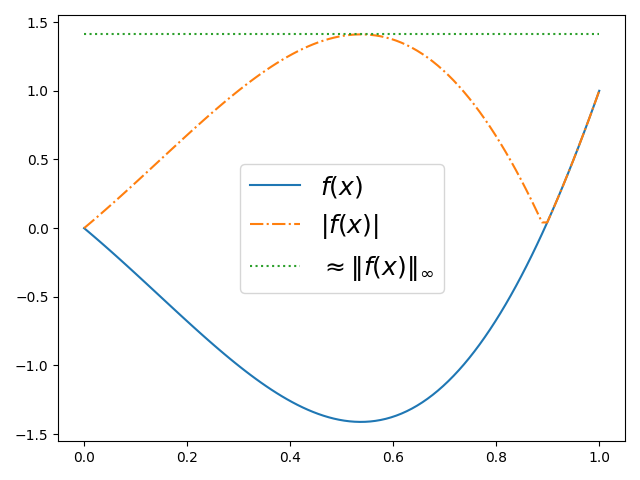

In [38]:
%matplotlib widget
plt.figure(0)
plt.plot(x, f(x), label='$f(x)$')
plt.plot(x, np.abs(f(x)), ls='-.', label='$|f(x)|$')
plt.plot(x, np.linalg.norm(f(x), ord=np.inf)*np.ones(len(x)),
         ls = ':', label=r'$\approx \|f(x)\|_\infty$')
plt.legend(fontsize=18)
plt.tight_layout()

---
#### Examples of convergent sequences in $\mathcal{C}([a,b])$:
---

- Let $a=0$ and $b=1$, then $f_n(x)=x/n$ for each $n\in\mathbb{N}$ defines a sequence in $\mathcal{C}([0,1])$ that converges uniformly to the zero function. Moroever, the sequence of derivative functions is $f_n'(x)=1/n$ (which is a sequence of constant functions) that also converge uniformly to the zero function.

- Let $a=0$ and $b=1$, then $f_n(x)=\sin(n\pi x)/n$ for each $n\in\mathbb{N}$ defines a sequence in $\mathcal{C}([0,1])$ that converges uniformly to the zero function. However, the sequence of derivative functions is $f_n'(x)=\pi\cos(n\pi x)$ which is a bounded sequence in $\mathcal{C}([0,1])$ but fails to converge at almost every point in $[0,1]$ and certainly does *not* converge uniformly. 

- A useful example of a sequence of functions that converges at every point in $[0,1]$ but fails to converge uniformly is the sequence defined by $(x^n)\subset\mathcal{C}([0,1])$ which converges pointwise to the discontinuous function that is equal to $0$ for all $0\leq x<1$ and is equal to $1$ at $x=1$. 

---
#### Back to some definitions and notation
---

**Rate of Convergence (ROC)**. Let $X$ be a Banach space and $x_n\to x\in X$. We say that $x_n\to x$ with the rate $\alpha\in\mathbb{R}$ if there exists a constant $c\in\mathbb{R}$ (not depending on $n$) such that

$$ \large \|x_n-x\| \leq c\left(\frac{1}{n}\right)^\alpha. $$
   
- If $\alpha=1$, we say that the rate of convergence is either first-order or linear.

- If $\alpha=2$, we say that the rate of convergence is either second-order of quadratic.
You should get the idea for $\alpha > 2$.

**Superlinear Convergence**. We say that a sequence $(x_n)\subset X$ converges superlinearly towards $x\in X$ if there is a positive sequence of real numbers $(c_n)\subset\mathbb{R}$ such that $c_n\to 0$ and $\|x_n-x\| \leq \dfrac{c_n}{n}$.

**The $\mathcal{O}$-Notation ("Big-Oh" Notation)**. <mark>(This is not a standard definition of the notation, but it is useful for the purposes of this class.)</mark> Let $X$ be a Banach space, $(x_n)\subset X$, and $(y_n)$ a sequence of real numbers with $y_n\geq 0$ for all $n$. If there is a finite constant $c$, not depending on $n$, such that 

$$\large \|x_n\| \leq cy_n \ \ \ \forall \ n\geq 1,$$

we say that the sequence $(x_n)$ is of order $(y_n)$, and we write, 

$$\large x_n=\mathcal{O}(y_n).$$

---
#### Connecting $\mathcal{O}$-notation with ROC and practical estimation of ROC
---

<mark>When a sequence converges, it is useful to conceptualize each element in the sequence as an approximation to the limit.</mark> 

When the space is a Banach space, then we can make sense of $x_n-x$ as some approximation to the zero vector. In other words, we think of the ***sequence of errors*** $(e_n):=(x_n-x)$ defined by each approximation subtracted from the limit. We are then interested in the ROC of $\| e_n \|\to 0$. It is sometimes convenient to directly define the error sequence as $(e_n)=(\|x_n-x\|)$ so that the error vectors are transformed into a sequence of real numbers that should converge to zero. 

It turns out that many useful methods for estimating solutions have a ROC that is expressed in terms of $\mathcal{O}(h(n)^\alpha)$ where $n$ defines something related to the "effort" used in the method and $h(n)$ maps this to some sort of "discretization" parameter. In this class, we will often see that $n$ refers to the number of interior points used to discretize an interval like $[0,1]$ and $h(n)=\dfrac{1}{n+1}$ is the spacing between these interior points. Methods are often referred to as first- or second-order if $\alpha=1$ or $\alpha=2$. 

This still does not address how we actually estimate the ROC. We do this by taking logarithms of both sides of the inequality in the definition of ROC with $h(n)$ replacing $1/n$ above to yield
    
$$
    \large \log \|x_n-x\| \leq \alpha \log \left(c h(n)\right) = \alpha\log c + \alpha \log\left(h(n)\right). 
$$

With this, we can perform regression using ``polyfit`` within ``numpy`` (see https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html for more info) to fit a line to the logarithm of a few terms from the sequences $\|x_n-x\|$ and $h(n)$ and take the slope of that line to get an estimate of the ROC.

**Before we estimate ROC.** An important point is that we first must determine the limit of $(x_n)$, which is not always obvious. Plots are useful tools if the Banach space can be easily visualized. However, we often must resort to ***the method of manufactured solutions*** to numerically investigate or verify ROCs. 

---
### Section 1.2.2: Examples of real-valued sequences converging to zero
---

Below, we show how to estimate the rate of convergence for some sequences that converge to zero.

We know that 

- $x_n = \sqrt{\dfrac{1}{n}} \Rightarrow x_n = \mathcal{O}\left(\left(\dfrac{1}{n}\right)^{1/2}\right)$

- $x_n = \sin(1/n) \approx 1/n$ if $n$ is sufficiently large since $\sin(\theta)\approx \theta$ if $|\theta|\ll 1$ (i.e., if $\theta$ is close to zero). Thus, $x_n=\sin(1/n) = \mathcal{O}\left(\left(\dfrac{1}{n}\right)\right)$.

- By a similar argument as the above example, $x_n = \sqrt{\dfrac{1}{n}} \sin^2(1/n) = \mathcal{O}\left(\left(\dfrac{1}{n}\right)^{5/2}\right)$.


We explore these in code below.

In [39]:
N = 50  # Define the number of terms to compute for each sequence
n = np.linspace(1, N, num=N)  # Create an array of integers from 1 to N

x1 = np.sqrt(1./n)  # Seq. 1
x2 = np.sin(1./n)  # Seq. 2
x3 = np.sqrt(1./n) * np.sin(1./n)**2  # Seq. 3

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_4774/3442633437.py:8: SyntaxWarning: invalid escape sequence '\s'
  ax1.set_title('$x_n = \sqrt{1/n}$')
/tmp/ipykernel_4774/3442633437.py:9: SyntaxWarning: invalid escape sequence '\s'
  ax2.set_title('$x_n = \sin(1/n) $')
/tmp/ipykernel_4774/3442633437.py:10: SyntaxWarning: invalid escape sequence '\s'
  ax3.set_title('$x_n = \sqrt{1/n}\sin^2(1/n)$')


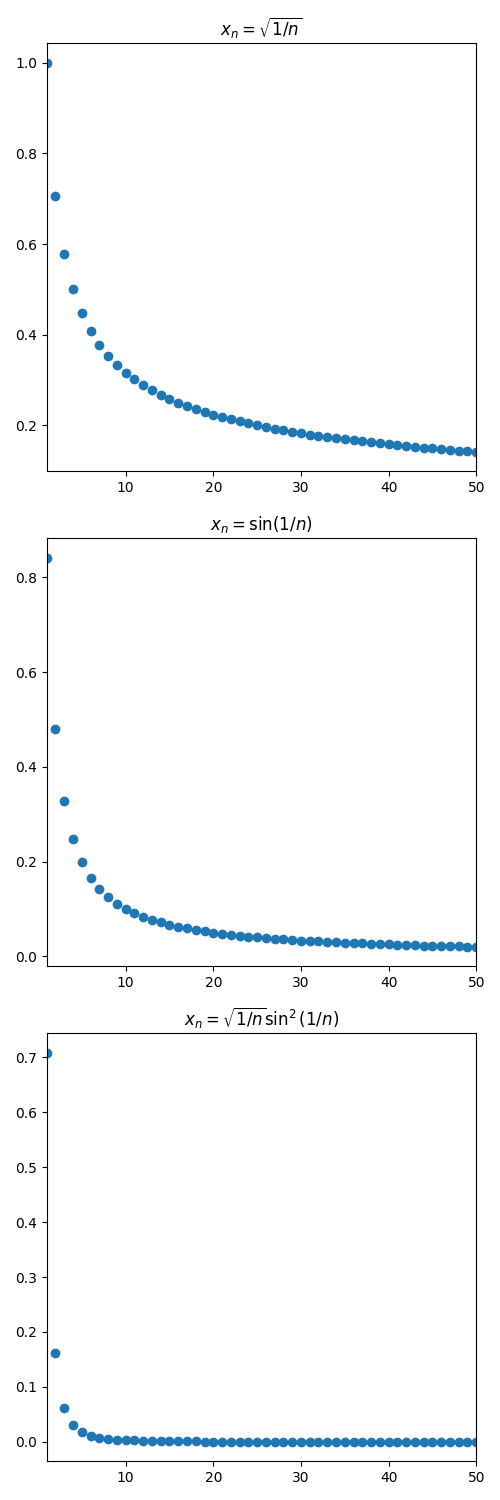

In [40]:
%matplotlib widget
fig = plt.figure(figsize=(5, 15))  

ax1 = fig.add_subplot(3, 1, 1)  # 3x1 array - subplot 1
ax2 = fig.add_subplot(3, 1, 2)  # 3x1 array - subplot 2
ax3 = fig.add_subplot(3, 1, 3)  # 3x1 array - subplot 3

ax1.set_title('$x_n = \sqrt{1/n}$')
ax2.set_title('$x_n = \sin(1/n) $')
ax3.set_title('$x_n = \sqrt{1/n}\sin^2(1/n)$')

ax1.set_xlim(1, N)
ax2.set_xlim(1, N)
ax3.set_xlim(1, N)

ax1.scatter(n, x1)
ax2.scatter(n, x2)
ax3.scatter(n, x3)
plt.tight_layout()

In [41]:
x_lim = 0  # limit for each sequence

# Remember to always take the absolute value before computing the 
# log of errors since errors can be positive or negative
x1_errors = np.abs(x1 - x_lim)
x2_errors = np.abs(x2 - x_lim)
x3_errors = np.abs(x3 - x_lim)

In [42]:
# If we append a [0] to the end of the following polyfit calls, then we only return the slopes
ROC_1 = np.polyfit(np.log(1./n), np.log(x1_errors), 1)[0]
ROC_2 = np.polyfit(np.log(1./n), np.log(x2_errors), 1)[0]
ROC_3 = np.polyfit(np.log(1./n), np.log(x3_errors), 1)[0]

print("ROC for $x_1$ = ", ROC_1)
print("ROC for $x_2$ = ", ROC_2)
print("ROC for $x_3$ = ", ROC_3)

ROC for $x_1$ =  0.5000000000000004
ROC for $x_2$ =  0.9823713801808257
ROC for $x_3$ =  2.4647427603616516


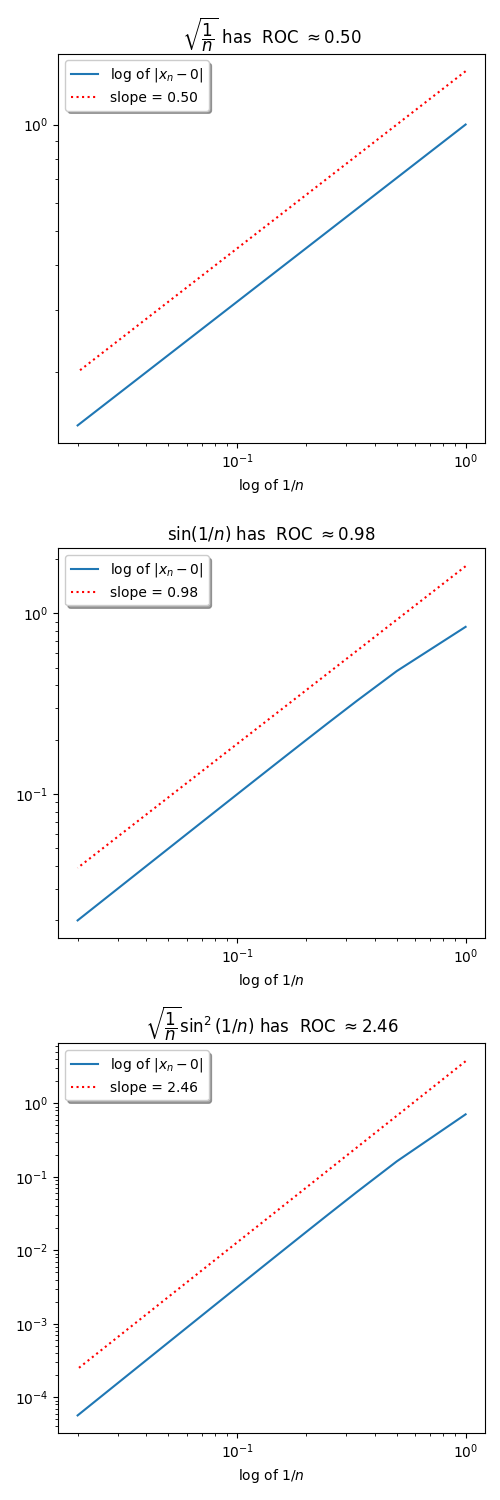

In [43]:
%matplotlib widget
fig = plt.figure(figsize=(5, 15))

ax1 = fig.add_subplot(3, 1, 1)  # 3x1 array - subplot 1
ax2 = fig.add_subplot(3, 1, 2)  # 3x1 array - subplot 2
ax3 = fig.add_subplot(3, 1, 3)  # 3x1 array - subplot 3

axs = [ax1, ax2, ax3]
ROCs = [ROC_1, ROC_2, ROC_3]
errors = [x1_errors, x2_errors, x3_errors]
sequence_strs = [r'$\sqrt{\dfrac{1}{n}}$', r'$\sin(1/n)$', r'$\sqrt{\dfrac{1}{n}} \sin^2(1/n)$']

for i in range(3):
    axs[i].loglog(1./n, errors[i], label='log of $|x_n - 0|$')
    
    slope_str = "{:1.2f}".format(ROCs[i])
    
    axs[i].loglog(1./n, (1./n * (errors[i][0]+1))**ROCs[i],  # Note the formula used to vertically offset this plot from the prior
               'r:', label='slope = ' + slope_str)
    
    title_str = sequence_strs[i] + r' has  ROC $\approx$' + slope_str
    
    axs[i].set_title(title_str)
    axs[i].set_xlabel('log of $1/n$')
    axs[i].legend(loc='upper left', shadow=True)
    
plt.tight_layout()

---
#### Student Activity
---

Numerically demonstrate that $x_n = \sqrt{\dfrac{3n+4}{n^2+2n-1}}=\mathcal{O}\left(\left(\dfrac{1}{n}\right)^{1/2}\right)$.

In [44]:
N = 50  # Define the number of terms to compute for each sequence
n = np.linspace(1, N, num=N)  # Create an array of integers from 1 to N

x1 = np.sqrt((3.*n+4)/(n**2+2.*n-1))  # Seq. 1

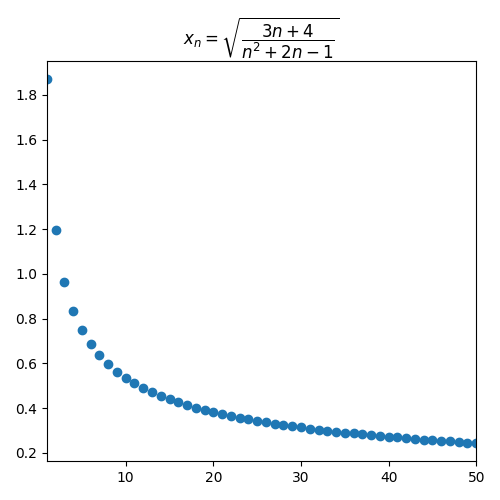

In [45]:
%matplotlib widget
fig = plt.figure(figsize=(5, 5))  

ax1 = fig.add_subplot(1, 1, 1)  # 3x1 array - subplot 1

ax1.set_title(r'$x_n = \sqrt{\dfrac{3n+4}{n^2+2n-1}}$')

ax1.set_xlim(1, N)

ax1.scatter(n, x1)
plt.tight_layout()

In [46]:
x_lim = 0  # limit for each sequence

# Remember to always take the absolute value before computing the 
# log of errors since errors can be positive or negative
x1_errors = np.abs(x1 - x_lim)

In [47]:
# If we append a [0] to the end of the following polyfit calls, then we only return the slopes
ROC_1 = np.polyfit(np.log(1./n), np.log(x1_errors), 1)[0]

print("ROC for $x_1$ = ", ROC_1)

ROC for $x_1$ =  0.4987923622819243


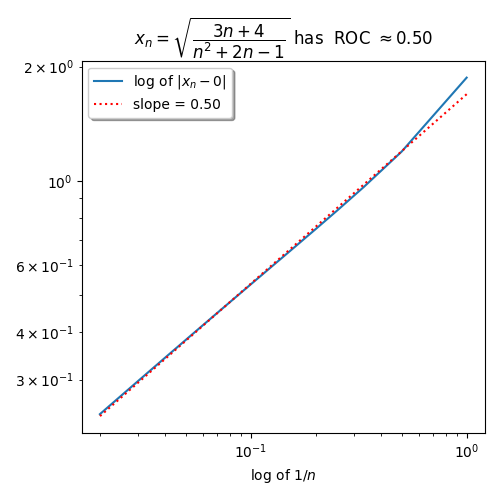

In [48]:
%matplotlib widget
fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(1, 1, 1) 

sequence_strs = r'$x_n = \sqrt{\dfrac{3n+4}{n^2+2n-1}}$'

ax1.loglog(1./n, x1_errors, label='log of $|x_n - 0|$')

slope_str = "{:1.2f}".format(ROC_1)

ax1.loglog(1./n, (1./n * (x1_errors[0]+1))**ROC_1,  # Note the formula used to vertically offset this plot from the prior
           'r:', label='slope = ' + slope_str)

title_str = sequence_strs + r' has  ROC $\approx$' + slope_str

ax1.set_title(title_str)
ax1.set_xlabel('log of $1/n$')
ax1.legend(loc='upper left', shadow=True)
    
plt.tight_layout()

---
#### ROC with $h=\dfrac{1}{n}$
---

When discretizing PDEs, we often let $h$ denote a spatial discretization parameter in a particular direction. 
If we use "regular" discretizations, then this means we specify a number of points in each direction to define a grid where the spacing of points in a particular direction is uniform. 
We often use $n$ to refer to the number of interior points in a direction, which means that the spacing between the grid points is given by $h=\dfrac{c}{n+1}$ where $c$ is the length of the direction. Usually $c=1$ when the length of the direction is normalized to unity. 
Thus, as $n\to\infty$, $h\to 0$, so all the definitions are easily changed by making the substitutions of $h$ for $1/n$ or $1/(n+1)$ (whichever makes the most sense for the given problem) and defining the ROC as $h\to 0$ instead of as $n\to\infty$.

We now estimate the ROC as $h\to 0$ for the prior sequences where $h=1/n$.

In [49]:
h = 1/n

ROC_1 = np.polyfit(np.log(h), np.log(x1_errors), 1)[0]
ROC_2 = np.polyfit(np.log(h), np.log(x2_errors), 1)[0]
ROC_3 = np.polyfit(np.log(h), np.log(x3_errors), 1)[0]

printmd("ROC for $x_1$ = {:5f}".format(ROC_1))
printmd("ROC for $x_2$ = {:5f}".format(ROC_2))
printmd("ROC for $x_3$ = {:5f}".format(ROC_3))

ROC for $x_1$ = 0.498792

ROC for $x_2$ = 0.982371

ROC for $x_3$ = 2.464743

---
### Section 1.2.3: Estimating ROC for derivative approximations to smooth functions
---

What is a ***smooth function***?

> A smooth function is as smooth as we need it to be. In other words, it has as many derivatives as is required by the analysis.

Below, we show simple [finite difference formulas](https://en.wikipedia.org/wiki/Finite_difference) for estimating derivatives of a ***smooth*** function of a single variable. 
They are all derived via simple Taylor series expansions. We make use of these throughout the course.

- A (first-order) forward finite difference scheme for $f'$: $\displaystyle \frac{f(x+h) - f(x)}{h} = f'(x) + O(h)$

- A (first-order) backward finite difference scheme for $f'$: $\displaystyle \frac{f(x) - f(x-h)}{h} = f'(x) + O(h)$

- A (second-order) centered finite difference scheme for $f'$: $\large \frac{f(x+h) - f(x-h)}{2h} = f'(x) + O(h^2)$

- A (second-order) centered finite difference scheme for $f''$: $\large \frac{f(x+h) - 2f(x) + f(x-h)}{h^2} = f''(x) + O(h^2)$

Below, we derive the first and third ones. 

---
#### Derivation of (first-order) forward finite difference scheme for $f'$
---
By the [Taylor series formula](https://en.wikipedia.org/wiki/Taylor_series), we have

$$
    \large f(x+h) = f(x) + f'(x)h + f''(x)\frac{h^2}{2} + {\cal O}(h^3), 
$$

which we use to solve for $f'(x)$ to derive the particular finite difference scheme. We show the steps below.

$$ \large
\begin{align}
 f(x+h) - f(x) &= f'(x)h + f''(x)\frac{h^2}{2} + {\cal O}(h^3) \\ \\ 
 \Rightarrow \frac{f(x+h)-f(x)}{h} &= \underbrace{f'(x) + + f''(x)\frac{h}{2} + \frac{{\cal O}(h^3)}{h}}_{\text{Notice the impact of dividing through by $h$}} \\ \\
 \Rightarrow \frac{f(x+h) - f(x)}{h} &= f'(x) + \underbrace{{\cal O}(h)}_{=f''(x)\frac{h}{2}} + \underbrace{{\cal O}(h^2)}_{=\frac{{\cal O}(h^3)}{h}} \\ \\
 \Rightarrow \frac{f(x+h) - f(x)}{h} &= f'(x) + {\cal O}(h)
\end{align}
$$

Above, we used the fact that if $\alpha>1$, then ${\cal O}(h) + {\cal O}(h^\alpha) = {\cal O}(h)$.

---
#### Derivation of (second-order) centered finite difference scheme for $f'$
---

By the Taylor series formula we have both

$$
 \large   f(x+h) = f(x) + f'(x)h + f''(x)\frac{h^2}{2} + f'''(x)\frac{h^3}{6}+{\cal O}(h^4),
$$

and

$$
 \large   f(x-h) = f(x) - f'(x)h + f''(x)\frac{h^2}{2} - f'''(x)\frac{h^3}{6}+{\cal O}(h^4).
$$

Then, we compute $f(x+h)-f(x-h)$ from which it follows that

$$
 \large   f(x+h) - f(x-h) = 2f'(x)h + \underbrace{f'''(x)\frac{h^3}{3}}_{={\cal O}(h^3)} + h.o.t.
$$

and dividing by $2h$ to both sides gives the result since ${\cal O}(h^3)/(2h) = {\cal O}(h^2)$. Above, "$h.o.t.$" stands for "higher order terms" to denote terms that are ${\cal O}(h^\alpha)$ for some $\alpha>3$ that are subsequently dropped in the analysis. $\Box$

---
#### Numerical verification of ROC for finite difference schemes (and some plotting and widget exploration)
---

Below, we see the following:

- How to implement all four of the finite difference schemes shown above and numerically investigate the ROC for all of them.

- How to make use of various plotting/labeling techniques/tricks that are, in general, useful to know.

- Issues involving numerical ROC studies that arise from finite-precision arithmetic (i.e., the limitations of using a computer). 

<mark>**First, we show the remarkably simple implementations of the various finite difference methods from above.**</mark>

In [50]:
# Pay attention to the parentheses in the code. Common coding mistakes involve not getting
# parentheses correct when implementing formulas/equations with fractions in code.

def fp_forward(f, x, h=0.01):  # The forward FD (FFD) approx to $f'$
    return (f(x+h)-f(x))/h

def fp_backward(f, x, h=0.01):  # The backward FD (BFD) approx to $f'$
    return (f(x)-f(x-h))/h

def fp_centered(f, x, h=0.01):  # The centered FD (CFD) approx to $f'$
    return (f(x+h)-f(x-h))/(2*h)  # Notice the parentheses around (2*h) in the denominator (a common mistake is to omit these)

def fpp_centered(f, x, h=0.01):  # The centered FD (CFD2) approx to $f''$
    return (f(x+h)-2*f(x)+f(x-h))/(h**2)  # The parentheses in the denominator are not necessary but improve the readability of the code

<mark>**Next, we use `sympy` to manufacture a solution to test these methods.**</mark>

In [51]:
# A manufactured solution
x = sym.symbols('x')

u = sym.exp(-x**2)*sym.sin(3*sym.pi*x)
u_p = u.diff(x, 1)
u_pp = u.diff(x, 2)

In [52]:
u  # Look at $u$

exp(-x**2)*sin(3*pi*x)

In [53]:
u_p  # Look at $u'$

-2*x*exp(-x**2)*sin(3*pi*x) + 3*pi*exp(-x**2)*cos(3*pi*x)

In [54]:
u_pp  # Look at $u''$. Who would want to compute this by hand?

(-12*pi*x*cos(3*pi*x) + 2*(2*x**2 - 1)*sin(3*pi*x) - 9*pi**2*sin(3*pi*x))*exp(-x**2)

<mark>**We need to transform the symbolic functions into computable functions.**</mark>

In [55]:
# We need to transform the symbolic functions into functions we can evaluate (and in particular evaluate on numpy arrays).
# To this end, we use the lambdify function within sympy which turns a symbolic function into one we can evaluate.

u_eval = sym.lambdify(x, u) 
u_p_eval = sym.lambdify(x, u_p)
u_pp_eval = sym.lambdify(x, u_pp)

<mark>**We can now plot the function $u$ and its derivatives $u'$ and $u''$ along with their finite difference approximations. Note the use of the `sympy` method `latex` used to create "fancy" labels for the titles of the plots. Also note that way in which we create some of the labels for plots with " " instead of ' '.**</mark>

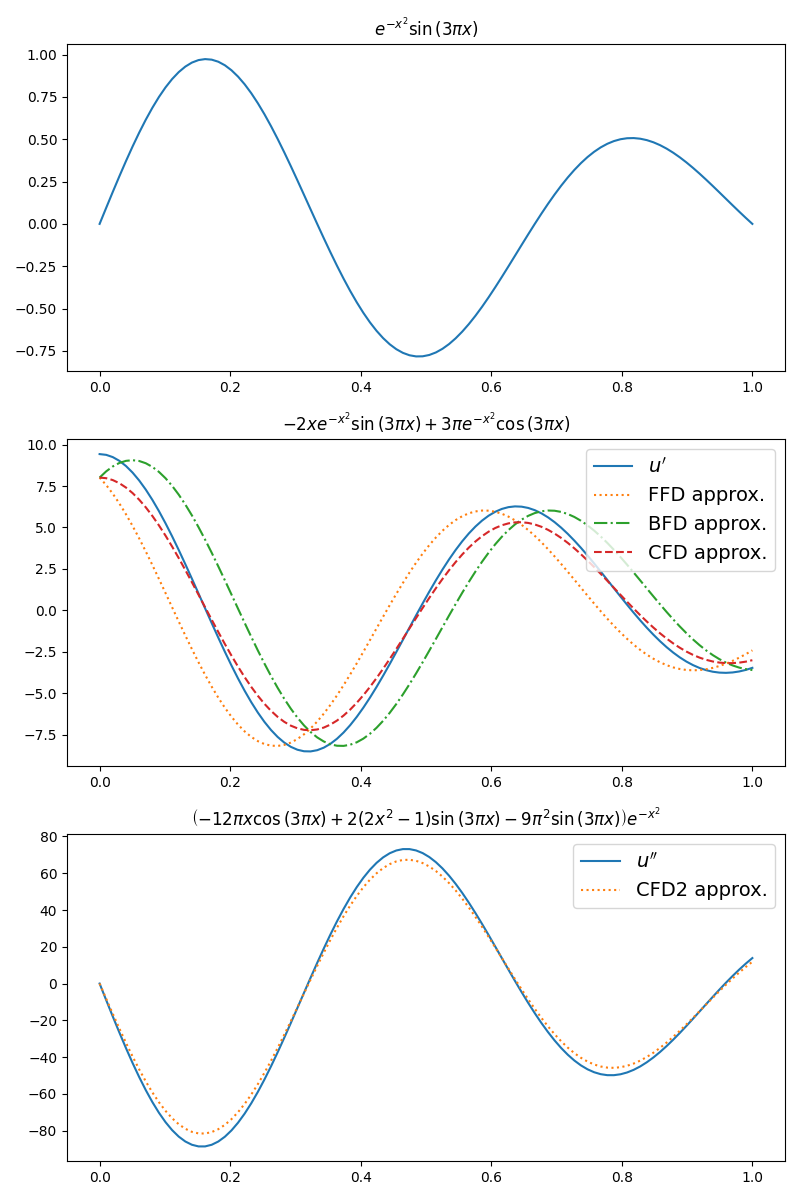

In [56]:
# We now plot the function and its derivatives (and derivative approximations)
%matplotlib widget

fig = plt.figure(figsize=(8, 12))

ax1 = fig.add_subplot(3, 1, 1)  # 3x1 array - subplot 1
ax2 = fig.add_subplot(3, 1, 2)  # 3x1 array - subplot 2
ax3 = fig.add_subplot(3, 1, 3)  # 3x1 array - subplot 3

xs = np.linspace(0, 1, 100)
h = 0.1

ax1.plot(xs, u_eval(xs))
ax1.set_title('$' + sym.latex(u) + '$')  # A neat trick for turning a symbolic function into a LaTeX string for labeling

ax2.plot(xs, u_p_eval(xs), label="$u'$")  # Notice the use of " " for the label so that the ' can be used within the label
ax2.plot(xs, fp_forward(u_eval, xs, h=h), ls=':', label='FFD approx.')
ax2.plot(xs, fp_backward(u_eval, xs, h=h), ls='-.', label='BFD approx.')
ax2.plot(xs, fp_centered(u_eval, xs, h=h), ls='--', label='CFD approx.')
ax2.set_title('$' + sym.latex(u_p) + '$')
ax2.legend(fontsize=14)

ax3.plot(xs, u_pp_eval(xs), label="$u''$")
ax3.plot(xs, fpp_centered(u_eval, xs, h=h), ls=':', label='CFD2 approx.')
ax3.set_title('$' + sym.latex(u_pp) + '$')
ax3.legend(fontsize=14)

plt.tight_layout()

<mark>**This is a good place to use widgets for greater interactivity so that we can explore the impact of changing the `h` parameter in the finite difference functions. Observe what happens to the second derivative approximation as soon as `h` is around $10^{-8}$. Why do you think this is? Why does it take longer for issues to arise in the first-order derivative approximations?**</mark>

In [57]:
def plot_derivs(f, xs, h, f_p=None, f_pp=None, fignum=4):
    fig = plt.figure(fignum, figsize=(8, 8))
    plt.clf()
    
    ax1 = fig.add_subplot(2, 1, 1)  
    ax2 = fig.add_subplot(2, 1, 2) 

    if f_p is not None:
        ax1.plot(xs, f_p(xs), label="$u'$")  
    ax1.plot(xs, fp_forward(f, xs, h=h), ls=':', label='FFD approx.')
    ax1.plot(xs, fp_backward(f, xs, h=h), ls='-.', label='BFD approx.')
    ax1.plot(xs, fp_centered(f, xs, h=h), ls='--', label='CFD approx.')
    ax1.legend(fontsize=14)

    if f_pp is not None:
        ax2.plot(xs, f_pp(xs), label="$u''$")
    ax2.plot(xs, fpp_centered(f, xs, h=h), ls=':', label='CFD2 approx.')
    ax2.legend(fontsize=14)
    
    plt.show()  # Needed in a function 
    plt.tight_layout()

In [58]:
%matplotlib widget

interact_manual(plot_derivs,
                f = fixed(u_eval),
                f_p = fixed(u_p_eval),
                f_pp = fixed(u_pp_eval),
                xs = fixed(np.linspace(0, 1, 100)),
                h = widgets.FloatLogSlider(value=0.1, base=10, max=-1, min=-16, step=1),
                fignum = fixed(4)
                )

interactive(children=(FloatLogSlider(value=0.1, description='h', max=-1.0, min=-16.0, step=1.0), Button(descri…

<function __main__.plot_derivs(f, xs, h, f_p=None, f_pp=None, fignum=4)>

<mark>**Now we numerically explore the ROC.**</mark>

Note that the theoretical ROC is defined pointwise. Is this ROC *uniform* across the domain $[0,1]$ for the function studied above?

In other words, given a function $f$ that is continuously differentiable, let $f'_h$ and $f''_h$ denote some finite difference approximations to $f'$ and $f''$, respectively. Suppose at any particular $x$-value that $f'_h(x)$ is an $\alpha$-order approximation to $f'(x)$ (i.e., $|f'_h(x) - f'(x)| = \mathcal{O}(h^\alpha)$) and $f''_h(x)$ is a $\beta$-order approximation to $f''(x)$ (i.e., $|f''_h(x) - f''(x)|=\mathcal{O}(h^\beta)$). Is it the case that $\|f'_h - f'\|_\infty = \mathcal{O}(h^\alpha)$ and $\|f''_h-f''\|_\infty = \mathcal{O}(h^\beta)$?

This is not as straightforward a question as it might appear because pointwise convergence does not, in general, imply uniform convergence (consider, for example, $f_n(x) = x^n$ for each $n\in\mathbb{N}$ on $[0,1]$ which converges pointwise, but not uniformly, to a function that is equal to $0$ for $x\in[0,1)$ and equal to $1$ for $x=1$). 

We numerically investigate this below.

***Note that `n=4` is the largest value that can be chosen to achieve numerical ROC that match what we expect from the theory for each method. Why is this?***

In [59]:
xs = np.linspace(0, 1, 200)  # Discretization of [0,1]

# Try n=4, 5, 6, 7, and 8 below
n = 5  # Defines 10^{-n} smallest h value and also the number of orders of magnitude of h to consider from 10^{-n} to 10^{-1}
hs = np.logspace(start=-1, stop=-n, num=n)  
print(hs)

[1.e-01 1.e-02 1.e-03 1.e-04 1.e-05]


In [60]:
# Initialize the error arrays that hold the sup-norm estimates of errors for various h
errors_FFD = np.zeros(n)
errors_BFD = np.zeros(n)
errors_CFD = np.zeros(n)
errors_CFD2 = np.zeros(n)

In [61]:
for i in range(n):
    errors_FFD[i] = np.linalg.norm(fp_forward(u_eval, xs, hs[i]) - u_p_eval(xs), ord=np.inf)
    errors_BFD[i] = np.linalg.norm(fp_backward(u_eval, xs, hs[i]) - u_p_eval(xs), ord=np.inf)
    errors_CFD[i] = np.linalg.norm(fp_centered(u_eval, xs, hs[i]) - u_p_eval(xs), ord=np.inf)
    errors_CFD2[i] = np.linalg.norm(fpp_centered(u_eval, xs, hs[i]) - u_pp_eval(xs), ord=np.inf)

In [62]:
Uniform_ROC_FFD = np.polyfit(np.log(hs), np.log(errors_FFD), 1)[0]
Uniform_ROC_BFD = np.polyfit(np.log(hs), np.log(errors_BFD), 1)[0]
Uniform_ROC_CFD = np.polyfit(np.log(hs), np.log(errors_CFD), 1)[0]
Uniform_ROC_CFD2 = np.polyfit(np.log(hs), np.log(errors_CFD2), 1)[0]

print("Uniform ROC for FFD = {:5f}".format(Uniform_ROC_FFD))
print("Uniform ROC for BFD = {:5f}".format(Uniform_ROC_BFD))
print("Uniform ROC for CFD = {:5f}".format(Uniform_ROC_CFD))
print("Uniform ROC for CFD2 = {:5f}".format(Uniform_ROC_CFD2))

Uniform ROC for FFD = 0.997577
Uniform ROC for BFD = 0.997590
Uniform ROC for CFD = 1.995526
Uniform ROC for CFD2 = 1.606423


<mark>**Plots are always very useful for helping us understand things. It is always worth it to try and visualize data.**</mark>

In [63]:
%matplotlib widget

plt.figure(5)
# Feel free to change which error is plotted below although the CFD2 and CFD ones are the most interesting
# Look at this plot if n is 5 or more above and it is the CFD2 error being plotted (or 7 or more for the CFD error)
plt.loglog(hs, errors_CFD2)  
plt.tight_layout()

---
### Section 1.2.4: An alternative ROC computation and detecting finite precision arithmetic issues 
---

An alternative approach to computing the ROC by fitting a line to the "loglog" of all the data of normed errors vs. discretization parameters is to *iteraticaly track* how the ROC is evolving. This is, in essence, what is discussed on the Wiki page https://en.wikipedia.org/wiki/Rate_of_convergence.

Put simply, we can compute the slopes of individual line segments connecting consecutive points in the loglog space of normed errors vs. discretization parameter. This will often reveal what, if any, magnitudes of discretization parameters result in significant finite precision arithmetic errors, but there is a catch (we will see this below).

First, we recall that if $\|e_h\| = \mathcal{O}(h^\alpha)$, then there is a $c$, independent of $h$, such that $\|e_h\| = c\left(h^\alpha\right)$, which implies

$$
    \log \|e_h\| = \log c + \alpha \log h.
$$

This subsequently implies for $h_1\neq h_2$ that

$$
    \log \|e_{h_1} \| - \log \| e_{h_2} \| = \alpha (\log h_1 - \log h_2).
$$

Since $\log a - \log b = \log (a/b)$, we then have

$$
    \alpha = \frac{\log\left(\frac{e_{h_1}}{e_{h_2}}\right)}{\log\left(\frac{h_1}{h_2}\right)}.
$$

We show this in code below.

In [64]:
iterative_ROC_estimates = np.log(errors_CFD2[1:-1]/errors_CFD2[0:-2]) / np.log(hs[1:-1]/hs[0:-2])

print(iterative_ROC_estimates)  # Recall that the hs array is in increasing order

[1.98478741 1.99984747 1.999965  ]


---
#### The catch
---

This approach of iteratively monitoring $\alpha$ may lead to incorrect ROC inferences. Or, at the very least, it is possible that it misleads one as to the ROC. In practice, it is important to look at the "limiting behavior" of the sequence of $\alpha$ values computed using the method above (assuming that issues from finite precision arithmetic have been avoided).

As an example, consider $e_h = |h\log(h)|$ as $h\to 0$ (and it should be clear we really mean $h\downarrow 0$). 

First, does the limit even exist? Rewrite $e_h$ and observe that the limit is a so-called indeterminate form

$$
 \large   e_h = \left|\frac{\log h}{1/h}\right| \to \frac{\infty}{\infty} \ \ \text{ as } h\to 0.
$$

We then recall a certain rule about [hospitals from calculus](https://en.wikipedia.org/wiki/L%27H%C3%B4pital%27s_rule) to get

$$
 \large   \lim_{h\to 0} e_h = \lim_{h\to 0} \left|\frac{1/h}{-1/h^2}\right| = \lim_{h\to 0} |h| = 0.
$$

Let's play with this numerically.

In [65]:
hs = np.logspace(-14, -1, 10)

x_lame = np.abs(hs*np.log(hs))
print(x_lame)

[3.22361913e-13 8.04444464e-12 1.98089779e-10 4.79541023e-09
 1.13496554e-07 2.60330610e-06 5.70008174e-05 1.15651784e-03
 2.02279288e-02 2.30258509e-01]


In [66]:
alpha = np.log(x_lame[1:]/x_lame[0:-1])/np.log(hs[1:]/hs[0:-1])
print('-'*50)
print('Estimated ROC with successive differences: \n', alpha)

--------------------------------------------------
Estimated ROC with successive differences: 
 [0.96725931 0.96325339 0.95812871 0.9513394  0.94191408 0.92793866
 0.90503394 0.86039936 0.73125988]


In [67]:
print('-'*50)
print('Using regression to estimate ROC: ', np.polyfit(np.log(hs), np.log(x_lame), 1)[0], '\n')

--------------------------------------------------
Using regression to estimate ROC:  0.9226791397128794 



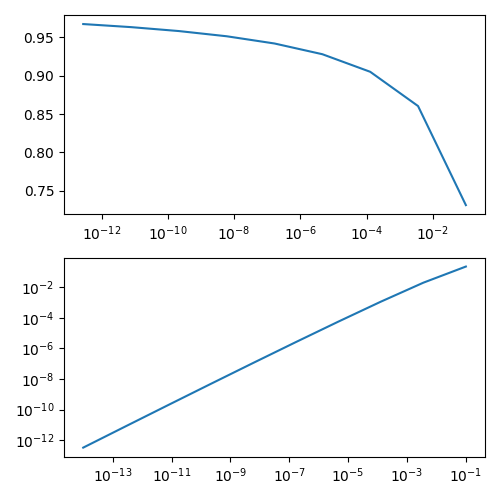

In [69]:
%matplotlib widget
fig = plt.figure(figsize=(5,5))

ax1 = fig.add_subplot(2, 1, 1)
ax1.semilogx(hs[1:], alpha)

ax2 = fig.add_subplot(2,1,2)
ax2.loglog(hs, x_lame)
plt.tight_layout()

Note that as $h\downarrow 0$ the computed $\alpha$ values from the iterative method appear to be converging to $1$. The regression-based approach of finding a line of best fit was not much better (it is underestimating the ROC). 

The main lesson here is that we should not turn our minds off when studying ROC. Plots are always a good idea and numerical investigations are no substitute for actual theoretical investigation.

All that being said, numerical methods are useful and a good first step to providing insight into how to tackle a problem theoretically or at least point us in the right direction of further mathematically rigorous investigation.

---
## Navigation:

- [Previous](https://github.com/CU-Denver-MathStats-OER/Intro-PDEs-Theory-and-Computations/blob/main/Chp1/Chp1Sec1.ipynb)

- [Next](https://github.com/CU-Denver-MathStats-OER/Intro-PDEs-Theory-and-Computations/blob/main/Chp1/Chp1Sec3.ipynb)
---